In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '1011'

In [3]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii,len(secretnumber))
                           
#circuit.cx(5, 6)
#circuit.cx(3, 6)
#circuit.cx(0, 6)

circuit.barrier()
circuit.h(range(len(secretnumber)))
#circuit.h([0,1,2,3,4,5])
circuit.barrier()
#circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

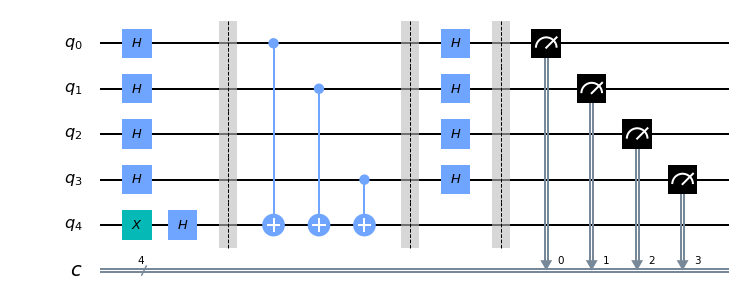

In [4]:
circuit.draw(output='mpl')

In [5]:
simulator = Aer.get_backend("qasm_simulator")
results = execute(circuit,backend=simulator, shots = 1).result()
counts = results.get_counts()
print(counts)

{'1011': 1}
